In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import tweepy
import csv
import random

In [2]:
df_=pd.read_csv('df1 (1).csv')

In [3]:
df_

,Unnamed: 0,Date,Prices,Comp,Negative,Neutral,Positive
0,0,2013-12-31,20.036428,0.000000,0.000000,1.000000,0.000000
1,1,2014-01-01,19.895535,0.069583,0.052333,0.862333,0.085333
2,2,2014-01-02,19.754642,0.099858,0.046417,0.885542,0.068000
3,3,2014-01-03,19.320715,-0.011772,0.098111,0.806000,0.095889
4,4,2014-01-04,19.373393,0.170180,0.000000,0.909000,0.091000
...,...,...,...,...,...,...,...
778,778,2016-03-27,26.357501,0.227836,0.000000,0.916545,0.083455
779,779,2016-03-28,26.297501,0.058890,0.056207,0.866552,0.077241
780,780,2016-03-29,26.920000,-0.046177,0.071615,0.876410,0.051949
781,781,2016-03-30,27.389999,0.089632,0.018464,0.915893,0.065679


In [5]:
train_start_index = 0
train_end_index = 626
test_start_index = 626
test_end_index = 782
train = df_.loc[train_start_index : train_end_index]
test = df_.loc[test_start_index:test_end_index]
print(len(train))
print(len(test))
print(train)
print(test)

627
157
     Unnamed: 0        Date     Prices      Comp  Negative   Neutral  Positive
0             0  2013-12-31  20.036428  0.000000  0.000000  1.000000  0.000000
1             1  2014-01-01  19.895535  0.069583  0.052333  0.862333  0.085333
2             2  2014-01-02  19.754642  0.099858  0.046417  0.885542  0.068000
3             3  2014-01-03  19.320715 -0.011772  0.098111  0.806000  0.095889
4             4  2014-01-04  19.373393  0.170180  0.000000  0.909000  0.091000
..          ...         ...        ...       ...       ...       ...       ...
622         622  2015-10-18  27.846251  0.157856  0.033750  0.864437  0.101813
623         623  2015-10-19  27.932501 -0.000185  0.076750  0.851650  0.071650
624         624  2015-10-20  28.442499  0.118065  0.024118  0.897206  0.078676
625         625  2015-10-21  28.440001  0.057997  0.025484  0.921613  0.052903
626         626  2015-10-22  28.875000  0.181100  0.011318  0.902727  0.085955

[627 rows x 7 columns]
     Unnamed: 0     

In [6]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive'],df_.loc[date,'Neutral']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [7]:
print(numpy_df_train)

[[0.         0.         1.        ]
 [0.05233333 0.08533333 0.86233333]
 [0.04641667 0.068      0.88554167]
 ...
 [0.02411765 0.07867647 0.89720588]
 [0.02548387 0.05290323 0.9216129 ]
 [0.01131818 0.08595455 0.90272727]]


In [8]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive'],df_.loc[date,'Neutral']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [9]:
print(numpy_df_test)

[[0.01131818 0.08595455 0.90272727]
 [0.02790476 0.09709524 0.875     ]
 [0.0449     0.0429     0.9122    ]
 [0.03309091 0.07490909 0.892     ]
 [0.03802381 0.06240476 0.89959524]
 [0.04580263 0.07486842 0.87932895]
 [0.03135385 0.10278462 0.86584615]
 [0.0254     0.07646667 0.89813333]
 [0.00627778 0.09014815 0.90359259]
 [0.00604545 0.09022727 0.90372727]
 [0.         0.0845     0.9155    ]
 [0.03314286 0.06242857 0.90442857]
 [0.02775    0.03541667 0.93683333]
 [0.02873684 0.06726316 0.904     ]
 [0.02381818 0.09942424 0.87678788]
 [0.02678947 0.07442105 0.89878947]
 [0.01341667 0.0085     0.97808333]
 [0.01094737 0.03026316 0.95878947]
 [0.05417391 0.05065217 0.89517391]
 [0.03318519 0.06866667 0.89811111]
 [0.0422     0.0935     0.8643    ]
 [0.02807143 0.04114286 0.93078571]
 [0.0908     0.05423333 0.85496667]
 [0.02       0.110125   0.87      ]
 [0.018875   0.0755     0.905625  ]
 [0.02859459 0.06756757 0.90383784]
 [0.0336     0.0987     0.86773333]
 [0.01221429 0.10914286 0.87

In [10]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(len(numpy_df_train))
print(len(numpy_df_test))
print(len(y_train))
print(len(y_test))
print(y_test)

627
157
627
157
        Prices
626  28.875000
627  29.770000
628  29.295000
629  29.295000
630  28.820000
..         ...
778  26.357501
779  26.297501
780  26.920000
781  27.389999
782  27.000000

[157 rows x 1 columns]


In [11]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

<ipython-input-11-fcb622bd595d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)


RandomForestRegressor()

In [12]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)
prediction = prediction

In [13]:
print(prediction)
prediction.shape

[[28.83712139]
 [23.39434854]
 [28.57190549]
 [26.83475862]
 [22.94453989]
 [27.60539686]
 [28.74253233]
 [27.34482307]
 [24.77055717]
 [25.15290003]
 [31.5118931 ]
 [26.82104283]
 [28.48189796]
 [26.16458192]
 [26.51070003]
 [28.92240106]
 [27.5840081 ]
 [28.56618973]
 [21.60369633]
 [26.65243203]
 [27.2493927 ]
 [24.24218016]
 [25.06187451]
 [25.93041058]
 [29.62861575]
 [25.70777303]
 [26.49914812]
 [26.79159826]
 [23.70892309]
 [29.3595221 ]
 [25.13431066]
 [26.38413216]
 [23.66646226]
 [26.18637867]
 [25.05389689]
 [28.26929994]
 [25.61186092]
 [27.96831786]
 [25.36270005]
 [27.23080859]
 [22.6672128 ]
 [26.06561092]
 [27.34159147]
 [24.46733589]
 [24.14203584]
 [26.81229969]
 [28.49357497]
 [26.380461  ]
 [28.43517685]
 [23.60872298]
 [24.11696986]
 [27.69145688]
 [25.37734827]
 [29.43360894]
 [25.14573975]
 [27.90822839]
 [31.19113783]
 [24.81837155]
 [27.17441097]
 [26.21400379]
 [21.06062139]
 [24.47833968]
 [27.27388939]
 [26.98333894]
 [30.23521796]
 [28.98036937]
 [29.12153

(157, 1)

In [15]:
import matplotlib.pyplot as plt

In [20]:
#idx=np.arange(int(test_start_index),int(test_end_index)+1)
idx=np.arange(626 ,783)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

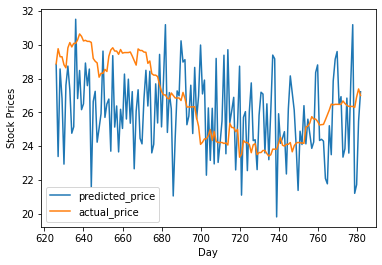

In [23]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot()#predicted value
ax.set_xlabel("Day")
ax.set_ylabel("Stock Prices")
y_test=y_test.astype(float)
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [22]:
print(rf.score(numpy_df_train, train['Prices']))

0.8397669643616564
